In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
import ast
from scipy.spatial import distance
df = pd.read_csv('train_data_combined.csv')

df.head(5)


,Id,Coordinates,Order,Distance,Time
0,1,"[[0, 0], [77, 165], [74, 170], [76, 30], [35, ...","[0, 4, 9, 18, 17, 11, 20, 19, 10, 7, 13, 1, 15...",612.197225,13.537999
1,2,"[[0, 0], [3, 10], [9, 29], [2, 49], [11, 53], ...","[0, 17, 1, 16, 12, 2, 6, 18, 15, 11, 3, 4, 10,...",148.663306,16.687000
2,3,"[[0, 0], [6, 12], [6, 3], [11, 12], [10, 15], ...","[0, 10, 18, 1, 11, 7, 4, 13, 12, 20, 6, 9, 16,...",93.222903,15.678530
3,4,"[[0, 0], [109, 6], [34, 37], [22, 72], [36, 57...","[0, 9, 19, 10, 14, 16, 11, 7, 20, 17, 18, 12, ...",498.477625,16.803660
4,5,"[[0, 0], [8, 49], [32, 37], [23, 34], [25, 49]...","[0, 15, 20, 12, 11, 17, 19, 6, 18, 2, 5, 3, 9,...",350.952202,17.877002


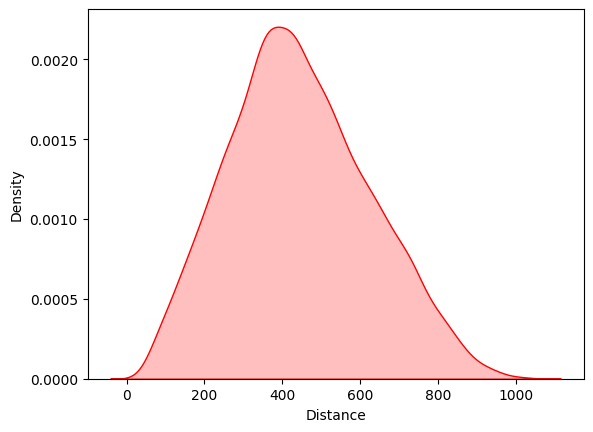

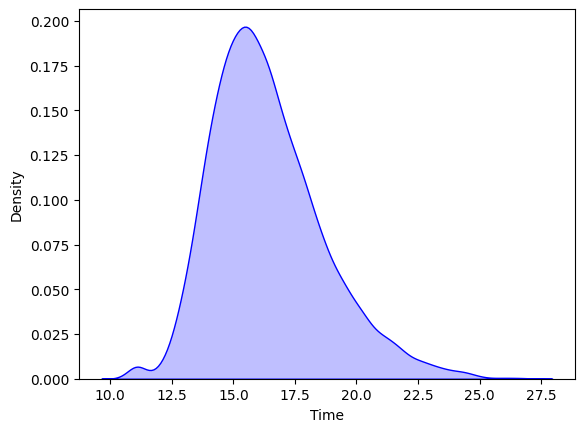

In [2]:
# kde plot of distance and time over the dataset
sns.kdeplot(df['Distance'], fill=True, color='r')
plt.show()
sns.kdeplot(df['Time'], fill=True, color='b')
plt.show()


In [3]:
# Make new Eval_Distance column with the total distance for the order of trips

def calculate_distance(row):
    order_string = row['Order']
    order = ast.literal_eval(order_string)
    # the coords are double incapsulated
    coords_string = row['Coordinates']
    coords = ast.literal_eval(coords_string)
    #print(order)
    #print(order[0])
    #print(coords)
    #print(coords[0])
    #print(coords[0][0]+coords[0][1])

    total_distance = 0
    arranged_points = []
    for point in order: 
        arranged_points.append((coords[point][0], coords[point][1]))
    #print(arranged_points)
    for i in range(len(arranged_points)-1):
        total_distance += distance.euclidean(arranged_points[i], arranged_points[i+1])
    return total_distance


df['Eval_Distance'] = df.apply(calculate_distance, axis=1)
print(df.head(5))

   Id                                        Coordinates  \
0   1  [[0, 0], [77, 165], [74, 170], [76, 30], [35, ...   
1   2  [[0, 0], [3, 10], [9, 29], [2, 49], [11, 53], ...   
2   3  [[0, 0], [6, 12], [6, 3], [11, 12], [10, 15], ...   
3   4  [[0, 0], [109, 6], [34, 37], [22, 72], [36, 57...   
4   5  [[0, 0], [8, 49], [32, 37], [23, 34], [25, 49]...   

                                               Order    Distance       Time  \
0  [0, 4, 9, 18, 17, 11, 20, 19, 10, 7, 13, 1, 15...  612.197225  13.537999   
1  [0, 17, 1, 16, 12, 2, 6, 18, 15, 11, 3, 4, 10,...  148.663306  16.687000   
2  [0, 10, 18, 1, 11, 7, 4, 13, 12, 20, 6, 9, 16,...   93.222903  15.678530   
3  [0, 9, 19, 10, 14, 16, 11, 7, 20, 17, 18, 12, ...  498.477625  16.803660   
4  [0, 15, 20, 12, 11, 17, 19, 6, 18, 2, 5, 3, 9,...  350.952202  17.877002   

   Eval_Distance  
0     613.197225  
1     149.663306  
2      94.222903  
3     499.477625  
4     351.952202  


In [4]:
import sklearn.preprocessing

def scale_coords(row):
    coords_string = row['Coordinates']
    coords = ast.literal_eval(coords_string)
    scaler = sklearn.preprocessing.MinMaxScaler()
    coords = scaler.fit_transform(coords)
    return coords
                    
def calculate_scaled_distance(row):
    order_string = row['Order']
    order = ast.literal_eval(order_string)
    # the coords are double incapsulated
    coords_string = row['Coordinates']
    coords = ast.literal_eval(coords_string)
    scaler = sklearn.preprocessing.MinMaxScaler()
    coords = scaler.fit_transform(coords)
    
    total_distance = 0
    arranged_points = []
    for point in order: 
        arranged_points.append((coords[point][0], coords[point][1]))
    #print(arranged_points)
    for i in range(len(arranged_points)-1):
        total_distance += distance.euclidean(arranged_points[i], arranged_points[i+1])
    return total_distance

                             
df['Scaled_Coordinates'] = df.apply(scale_coords, axis=1)
df.head(5)
df['Scaled_Distance'] = df.apply(calculate_scaled_distance, axis=1)

df.head(5)

,Id,Coordinates,Order,Distance,Time,Eval_Distance,Scaled_Coordinates,Scaled_Distance
0,1,"[[0, 0], [77, 165], [74, 170], [76, 30], [35, ...","[0, 4, 9, 18, 17, 11, 20, 19, 10, 7, 13, 1, 15...",612.197225,13.537999,613.197225,"[[0.0, 0.0], [0.7777777777777778, 0.9537572254...",4.950585
1,2,"[[0, 0], [3, 10], [9, 29], [2, 49], [11, 53], ...","[0, 17, 1, 16, 12, 2, 6, 18, 15, 11, 3, 4, 10,...",148.663306,16.687000,149.663306,"[[0.0, 0.0], [0.2727272727272727, 0.1587301587...",5.871461
2,3,"[[0, 0], [6, 12], [6, 3], [11, 12], [10, 15], ...","[0, 10, 18, 1, 11, 7, 4, 13, 12, 20, 6, 9, 16,...",93.222903,15.678530,94.222903,"[[0.0, 0.0], [0.46153846153846156, 0.428571428...",4.923503
3,4,"[[0, 0], [109, 6], [34, 37], [22, 72], [36, 57...","[0, 9, 19, 10, 14, 16, 11, 7, 20, 17, 18, 12, ...",498.477625,16.803660,499.477625,"[[0.0, 0.0], [0.865079365079365, 0.07317073170...",5.405094
4,5,"[[0, 0], [8, 49], [32, 37], [23, 34], [25, 49]...","[0, 15, 20, 12, 11, 17, 19, 6, 18, 2, 5, 3, 9,...",350.952202,17.877002,351.952202,"[[0.0, 0.0], [0.0963855421686747, 0.9999999999...",5.190999


In [5]:
def calculate_naive_scaled_distance(row):
    coords_string = row['Coordinates']
    coords = ast.literal_eval(coords_string)
    scaler = sklearn.preprocessing.MinMaxScaler()
    coords = scaler.fit_transform(coords)
    
    total_distance = 0
    arranged_points = []
    # sort coords by x
    #coords = sorted(coords, key=lambda x: x[0])
    
    for point in range(len(coords)): 
        arranged_points.append((coords[point][0], coords[point][1]))
    #print(arranged_points)
    for i in range(len(arranged_points)-1):
        total_distance += distance.euclidean(arranged_points[i], arranged_points[i+1])
    return total_distance
df['Naive_Scaled_Distance'] = df.apply(calculate_naive_scaled_distance, axis=1)


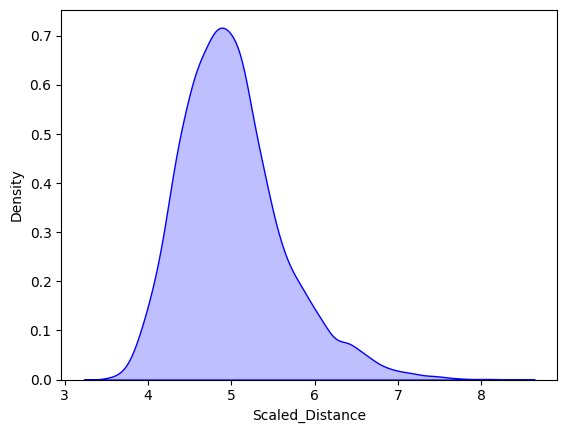

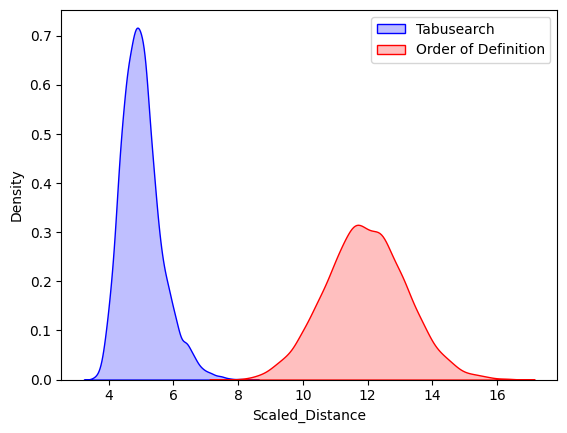

In [10]:
sns.kdeplot(df['Scaled_Distance'], fill=True, color='b')
plt.show()

# compare the naive and the non-naive approach in one plot
sns.kdeplot(df['Scaled_Distance'], fill=True, color='b')
sns.kdeplot(df['Naive_Scaled_Distance'], fill=True, color='r')
# make the legend
plt.legend(['Tabusearch', 'Order of Definition'])
plt.show()



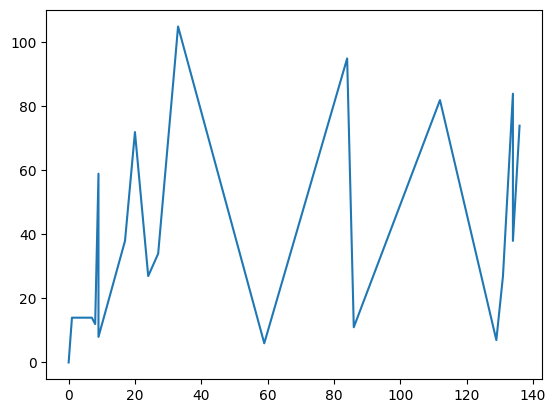

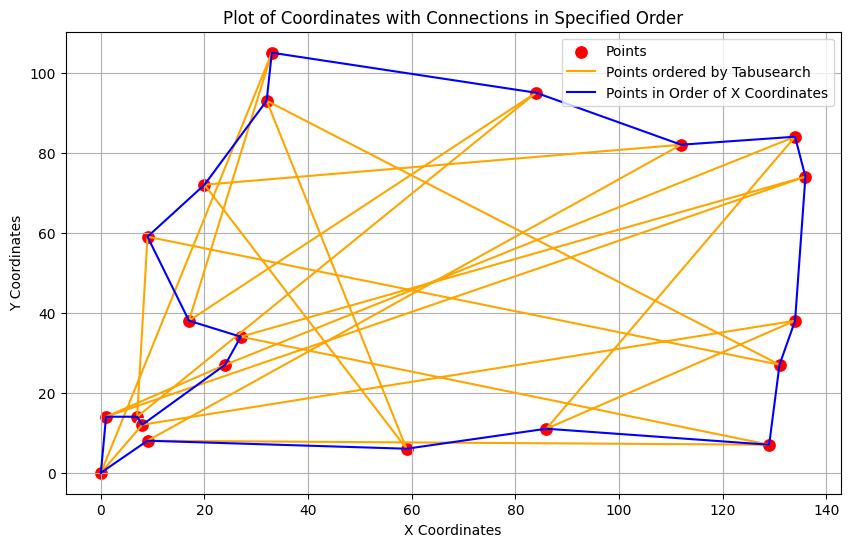

In [8]:
# make a plot of the scaled coordinates
def plot_scaled_coords(row):
    coords_string = row['Coordinates']
    coords = ast.literal_eval(coords_string)
    coords = sorted(coords, key=lambda x: x[0])
    x = [x[0] for x in coords]
    y = [x[1] for x in coords]
    plt.plot(x, y)
    plt.show()

# find the entry with the highest difference between the naive and the non-naive approach
max_diff = df['Scaled_Distance'] - df['Naive_Scaled_Distance']
max_diff_idx = max_diff.idxmin()

# Plot the points and connect them in the order of the order
def plot_coords(row):
    order_string = row['Order']
    order = ast.literal_eval(order_string)
    coords_string = row['Coordinates']
    coords = ast.literal_eval(coords_string)
    
    x_coords = []
    y_coords = []
    for point in order: 
        x_coords.append(coords[point][0])
        y_coords.append(coords[point][1])
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_coords, y=y_coords, color='red', s=100)  # Plot the points as red dots
    
    # Plot the points in ascending order of x
    #coords = sorted(coords, key=lambda x: x[0])
    x = [x[0] for x in coords]
    y = [x[1] for x in coords]
    plt.plot(x, y, color='orange')  # Connect the points with lines
    plt.plot(x_coords, y_coords, color='blue')  # Connect the points with lines

    # Adding labels and title
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.title('Plot of Coordinates with Connections in Specified Order')

    # Adding grid
    plt.grid(True)
    #Adding legend
    plt.legend(['Points', 'Points ordered by Tabusearch', 'Points in Order of X Coordinates'])
    # Show the plot
    plt.show()

plot_scaled_coords(df.iloc[max_diff_idx])
plot_coords(df.iloc[max_diff_idx])